# 필요 라이브러리 호출

In [61]:
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import numpy as np
import platform
# 정규식
import re

# 폰트 지정

In [62]:
import platform
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    plt.rcParams['axes.unicode_minus'] = False

# 데이터 호출, 컬럼 이름 재설정

In [63]:
df = pd.read_csv('weather_kw_df.csv')
df.rename(columns= {"kw":"usage"}, inplace=True)

df.head()

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,가로등,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,교육용,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,농사용,0.9,69,49.7,6.0,244.83,13.5,9785066
3,2016,1,산업용,0.9,69,49.7,6.0,244.83,13.5,261196271
4,2016,1,심 야,0.9,69,49.7,6.0,244.83,13.5,18357075


# 데이터 가공

In [64]:
def type_change(type):
    if type == "일반용":
        return 1
    elif type == '주택용':
        return 2
    elif type == '가로등':
        return 3
    elif type == '교육용':
        return 4
    elif type == '농사용':
        return 5
    elif type == '산업용':
        return 6
    elif type == '심 야':
        return 7  

In [65]:
df['type'] = df['type'].apply(lambda x: type_change(x))

In [66]:
df.sort_values(by=['year', 'month', 'type'], inplace=True)

In [67]:
df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
5,2016,1,1,0.9,69,49.7,6.0,244.83,13.5,255851378
6,2016,1,2,0.9,69,49.7,6.0,244.83,13.5,173309722
0,2016,1,3,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,4,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,5,0.9,69,49.7,6.0,244.83,13.5,9785066
...,...,...,...,...,...,...,...,...,...,...
581,2022,12,3,1.1,63,30.6,5.0,275.78,32.9,7316937
582,2022,12,4,1.1,63,30.6,5.0,275.78,32.9,31159967
583,2022,12,5,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,6,1.1,63,30.6,5.0,275.78,32.9,256259483


In [68]:
kw_df_year_month = df.drop(columns='type')

# 2016~2022 월별 전력 사용량 & 그래프

In [69]:
kw_df_year_month_year = df.pivot_table(index=['month'], 
                                     columns='year',
                                     values='usage', 
                                     aggfunc='sum')
kw_df_year_month_year

year,2016,2017,2018,2019,2020,2021,2022
month,,,,,,,
1,753434128,765085605,807535917,801473294,756531697,811864417,825882846
2,756942825,773394230,798506369,741798539,740068227,767227407,788536591
3,714022910,717911461,698659795,682608470,696886117,697760777,735401195
4,675078079,698719498,685492936,706906711,660659042,696052225,712892007
5,630983018,634698659,648944709,653101920,610865447,659750505,672419479
6,675463388,677388071,688052097,673982642,685305904,713734602,717565017
7,731854626,761987673,753263260,726580978,723737539,790945617,838798578
8,813713342,833272037,893914829,821995398,785929551,876521082,892014835
9,742389262,758364504,765903998,756642371,810365666,781758101,806887743


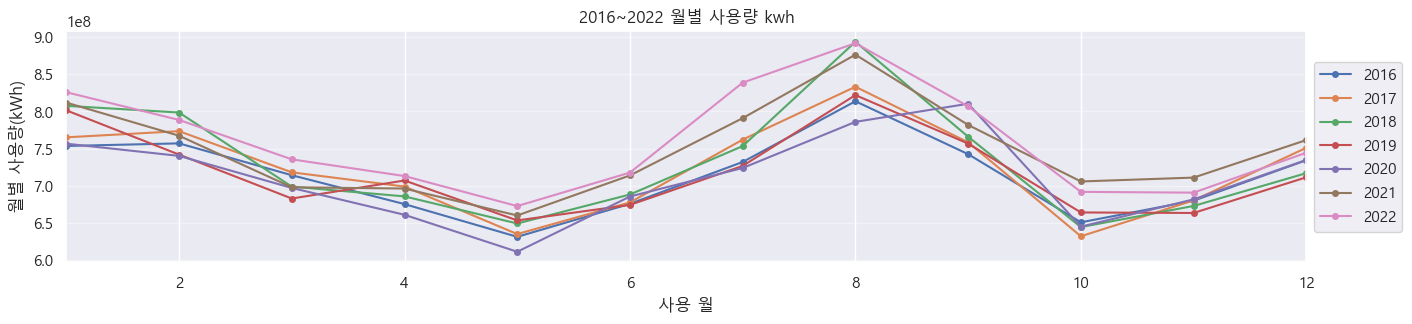

In [70]:
plt.figure(figsize = (16,3))
plt.plot(kw_df_year_month_year, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(kw_df_year_month_year.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2016~2022 월별 사용량 kwh')
plt.xlabel('사용 월')
plt.ylabel('월별 사용량(kWh)')
plt.autoscale(axis='x', tight=True)
plt.show()

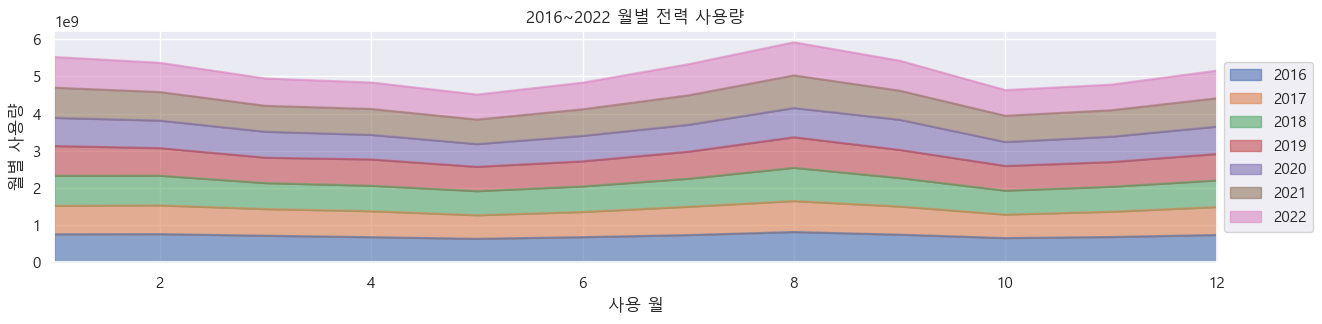

In [71]:
title='2016~2022 월별 전력 사용량'
ylabel='월별 사용량'
xlabel='사용 월'

ax = kw_df_year_month_year.plot.area(figsize=(15,3),alpha=0.6, title=title)
ax.set(xlabel=xlabel, ylabel=ylabel)
ax.autoscale(axis='x', tight=True)
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5));

In [72]:
df_drop_type = df.drop(['type'], axis=1)
kw_df = df_drop_type.groupby(['year', 'month','temp','Humidity_mean','rainfall_total','cloud','solar','snow'])['usage'].sum()
kw_df = kw_df.to_frame().reset_index()
kw_df

,year,month,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
0,2016,1,0.9,69,49.7,6.0,244.83,13.5,753434128
1,2016,2,3.3,60,45.2,4.5,348.22,5.6,756942825
2,2016,3,8.4,60,55.2,4.1,520.95,0.0,714022910
3,2016,4,15.5,66,185.0,5.8,541.64,0.0,675078079
4,2016,5,19.8,65,104.5,5.2,681.60,0.0,630983018
...,...,...,...,...,...,...,...,...,...
79,2022,8,26.9,90,106.4,7.3,454.30,0.0,892014835
80,2022,9,23.1,77,89.2,6.2,483.16,0.0,806887743
81,2022,10,16.0,65,38.3,4.0,459.57,0.0,691579483
82,2022,11,11.8,62,46.7,3.9,336.75,0.0,690524525


# 기온과 전력 소비량 시각화

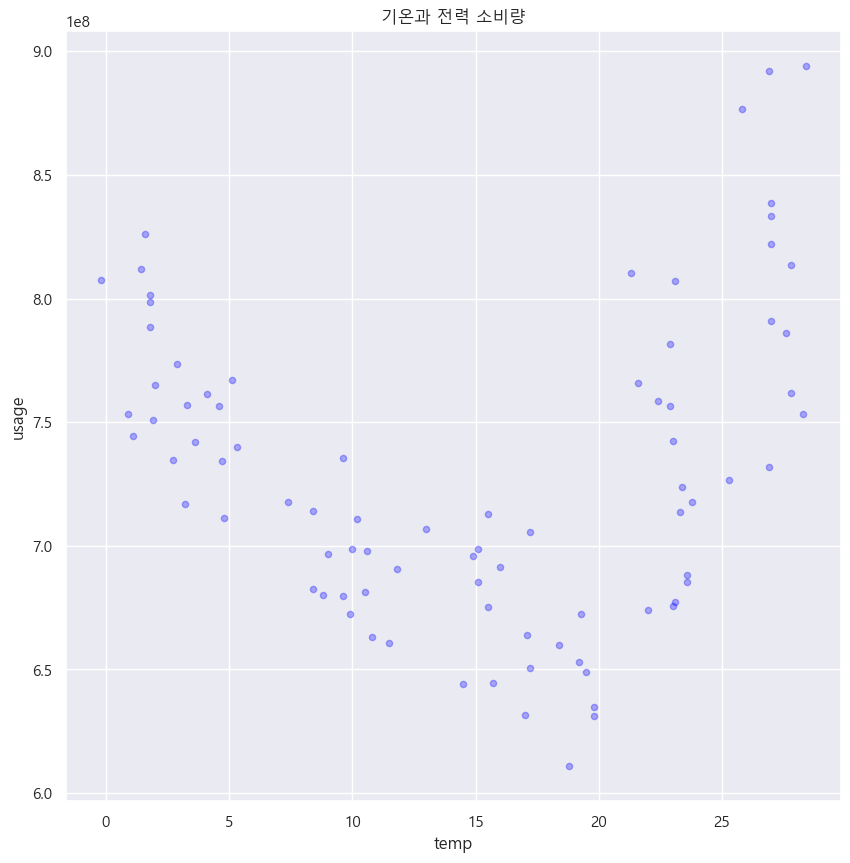

In [73]:

title='기온과 전력 소비량'
ylabel='전력 소비량'
xlabel='기온'
kw_df.plot.scatter(x='temp', y='usage', c='blue', cmap='coolwarm',alpha=0.3, title=title);


# 날씨와 전력 소비량의 상관관계 시각화 (월 기준)

In [74]:

weather_kw_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    fig = px.scatter(kw_df,
                    x="temp",
                    y="usage",
                    title='날씨와 전력량에 따른 관계',
                    template='plotly_dark',
                    color=feature,
                    color_continuous_scale=["white", "red"],
                    labels={'temp': '기온', 'usage': '전력량(kWh)', feature: col_label[feature]})
    fig.show()

In [75]:
weather_kw_df = ['temp', 'Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'temp' : '기온',
             'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    # Box plot 생성
    box = go.Box(x=kw_df[feature], y=kw_df['usage'], boxpoints='all')

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량에 따른 관계', xaxis={'title': col_label[feature]}, 
                    yaxis={'title': '전력량(kw)'},
                    template='plotly_dark')

    # 그래프 생성
    fig = go.Figure(data=[box], layout=layout)

    # 그래프 출력
    fig.show()

In [76]:
weather_kw_df = ['Humidity_mean','rainfall_total', 'cloud', 'solar', 'snow']
col_label = {'Humidity_mean' : '습도',
             'rainfall_total' : '강수량',
             'cloud' : '운량(구름의 양)',
             'solar' : '합계 일사량',
             'snow' : '적설량'}

for feature in weather_kw_df:
    # Heatmap 생성
    heatmap = go.Heatmap(x=kw_df['temp'], y=kw_df['usage'], z=kw_df[feature])

    # 레이아웃 생성
    layout = go.Layout(title='날씨와 전력량 데이터                  색 : ' + col_label[feature],
                       xaxis={'title': '기온'}, yaxis={'title': '전력량(kw)'})

    # 그래프 생성
    fig = go.Figure(data=[heatmap], layout=layout)

    # 그래프 출력
    fig.show()

In [77]:
kw_df.columns

Index(['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow', 'usage'],
      dtype='object')

In [78]:
type1_df = df.query("type == 1")
type2_df = df.query("type == 2")
type3_df = df.query("type == 3")
type4_df = df.query("type == 4")
type5_df = df.query("type == 5")
type6_df = df.query("type == 6")
type7_df = df.query("type == 7")

In [79]:
type_dic = [type1_df, type2_df, type3_df, type4_df, type5_df, type6_df, type7_df]

In [80]:
typename = {1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심 야'}

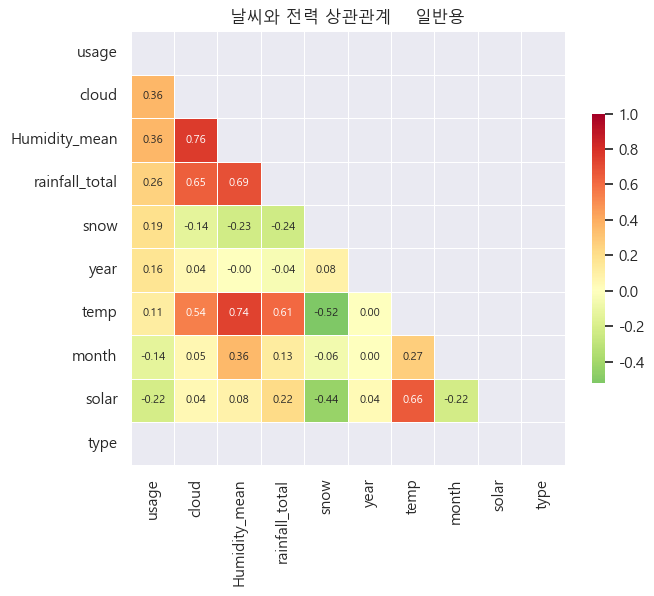

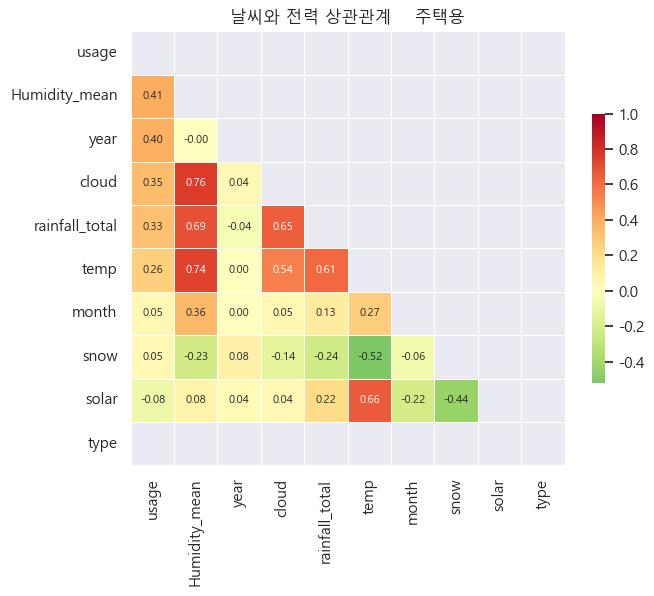

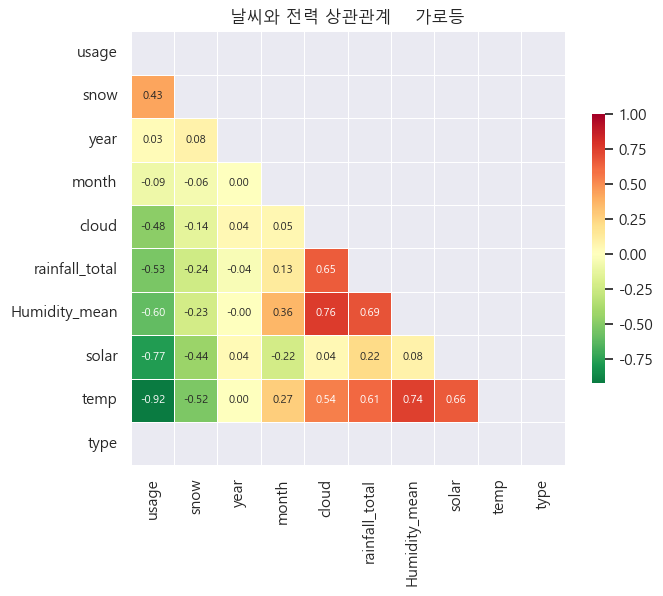

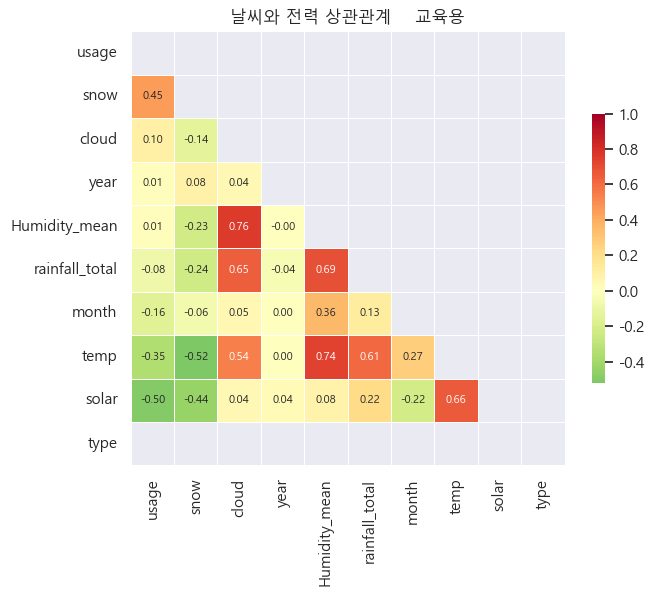

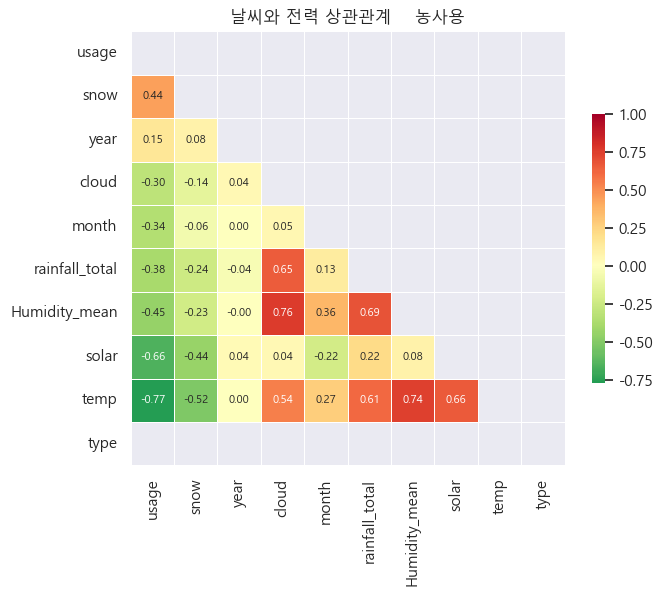

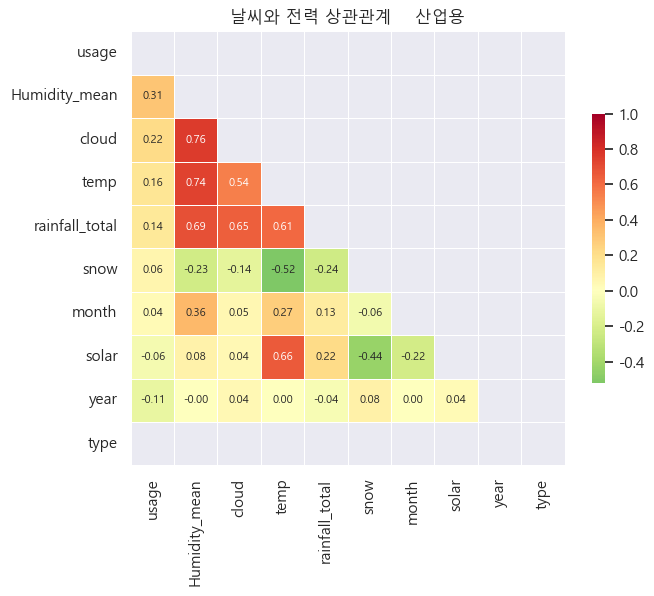

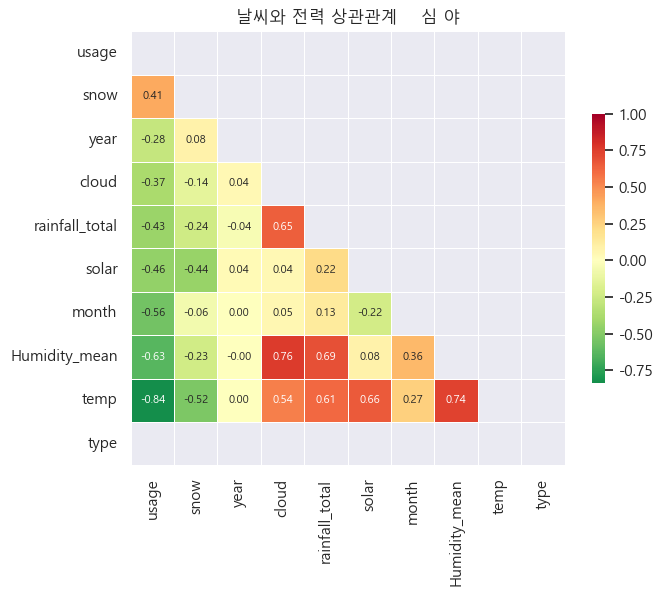

In [81]:
for i, item in enumerate(type_dic):
    num = i + 1
    
    kw_matrix = item.corr()
    kw_matrix = kw_matrix.sort_values(by = 'usage', axis = 0, ascending=False)
    kw_matrix = kw_matrix[kw_matrix.index]
    kw_matrix
    # 상관관계의 시각적 표현
    f, ax = plt.subplots(figsize=(7, 7))
    corr = kw_matrix.select_dtypes(exclude=["object","bool"]).corr()

    # 대각 행렬을 기준으로 한 쪽만 나타나게 설정해줍니다.
    mask = np.zeros_like(kw_matrix, dtype='bool')
    mask[np.triu_indices_from(mask)] = True

    g = sns.heatmap(kw_matrix, cmap='RdYlGn_r', vmax= 1, mask=mask, 
    center=0, annot=True, fmt='.2f', square=True, linewidths=.5, cbar_kws={"shrink": .5})
    plt.title("날씨와 전력 상관관계    " + typename[num])

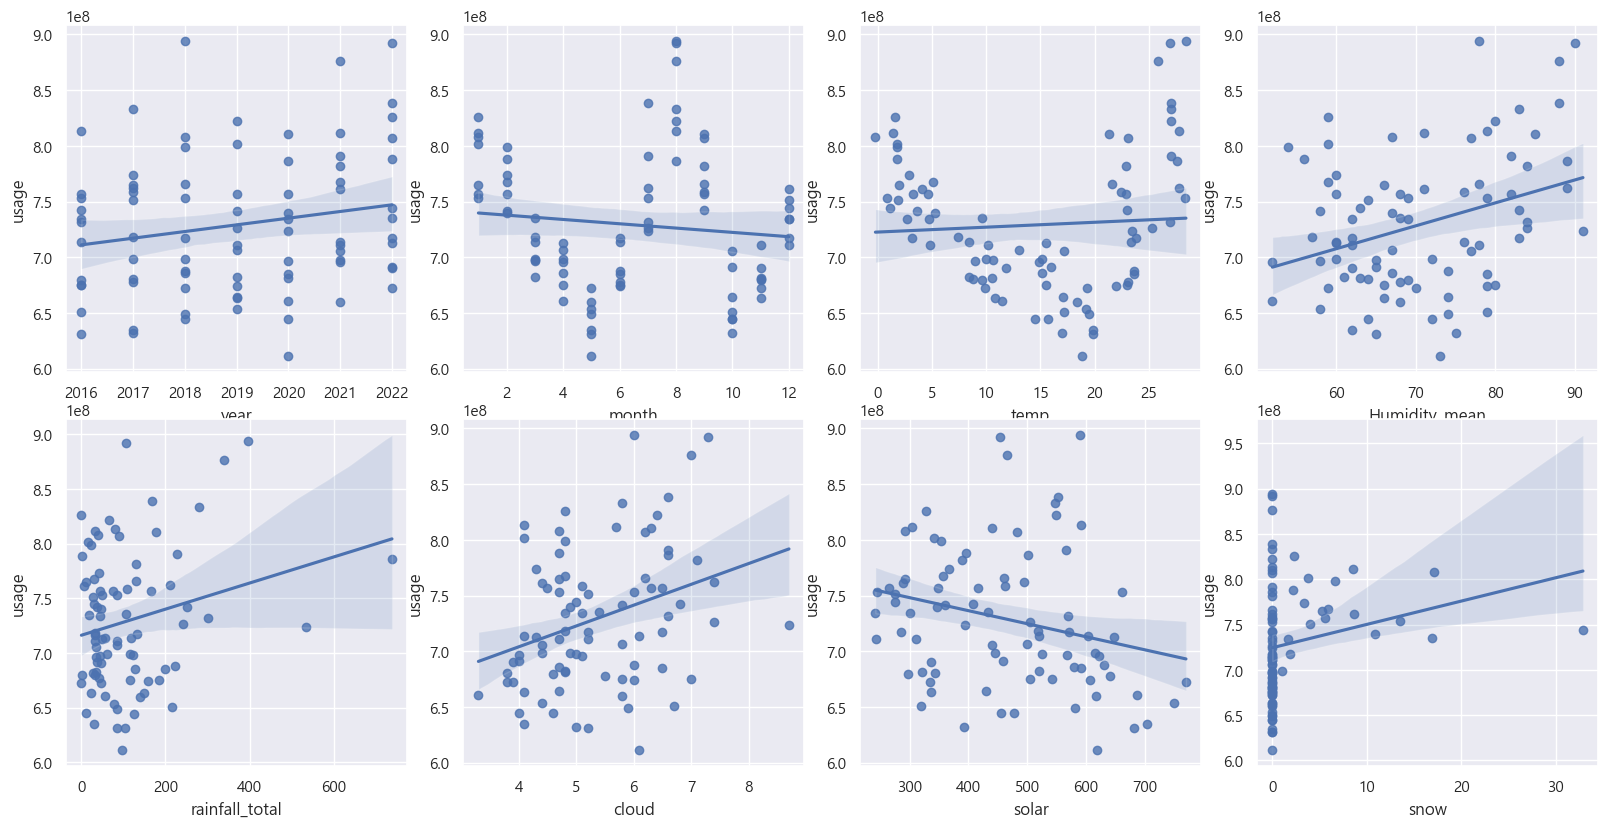

In [82]:
lm_features = ['year', 'month', 'temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']
fig, axs = plt.subplots(figsize=(16,8), ncols = 4, nrows = 2)
plt.tight_layout()
for i , feature in enumerate(lm_features):
    row = int(i/4)
    col = i % 4
    sns.regplot(x = feature, y = 'usage', data = kw_df, ax = axs[row][col])

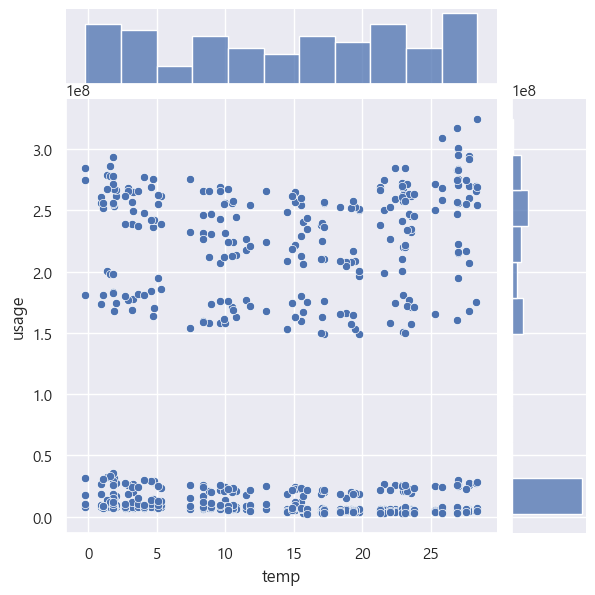

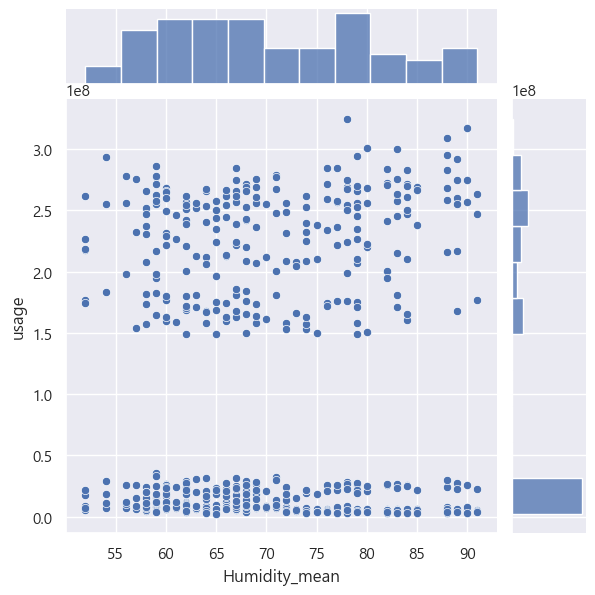

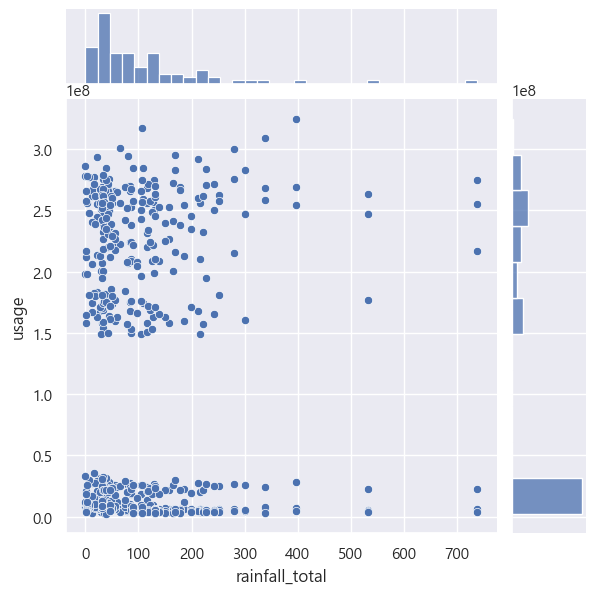

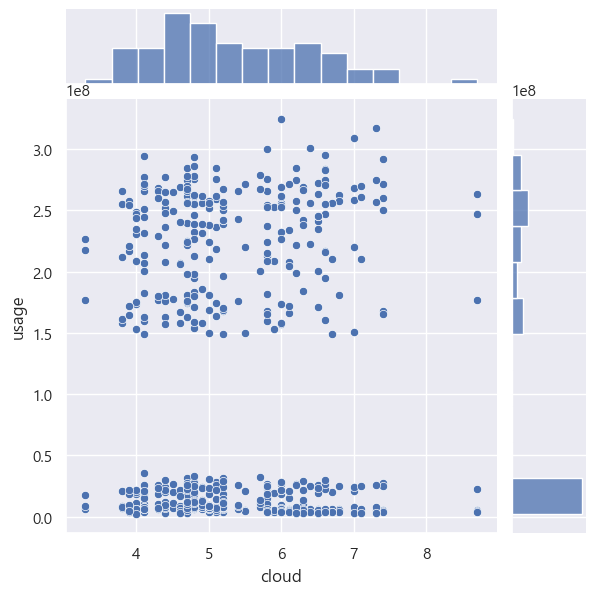

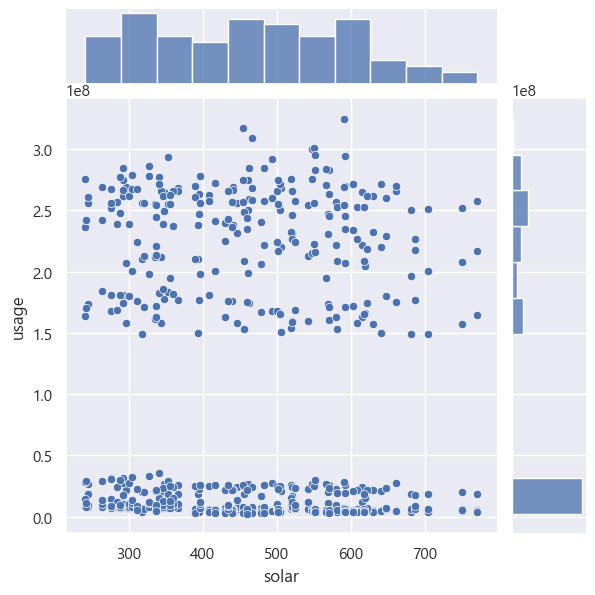

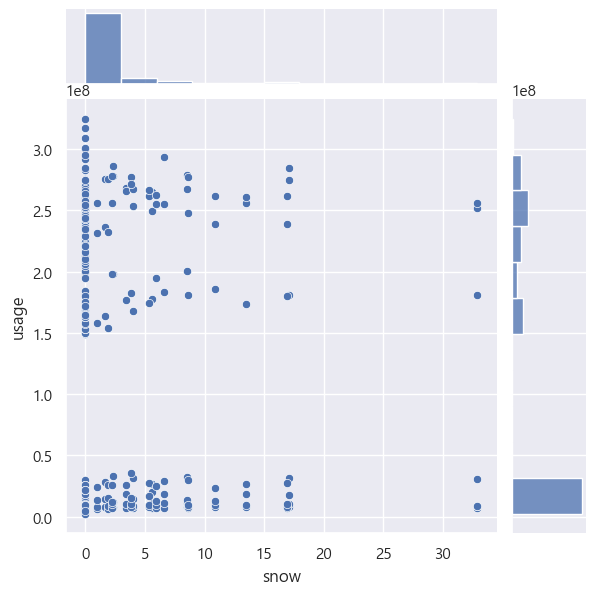

In [83]:
weather_df = ['temp', 'Humidity_mean', 'rainfall_total', 'cloud',
       'solar', 'snow']

for feature in weather_df:
    sns.jointplot(x = feature, y = 'usage', data = df)

# 월별 전력 사용량 그래프

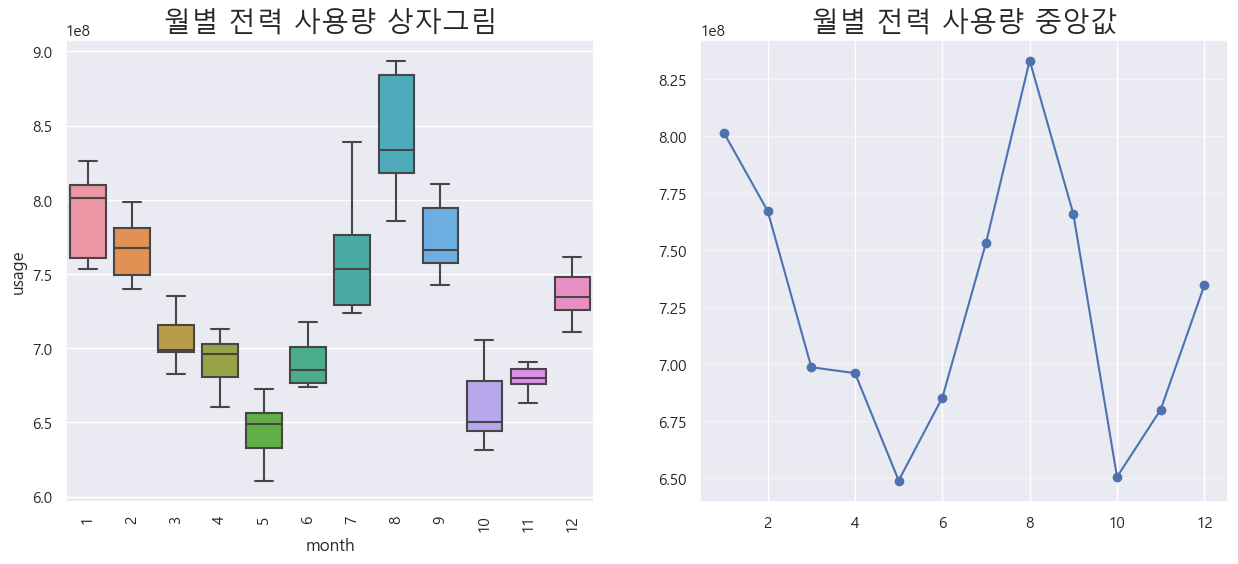

In [84]:
plt.figure(figsize=(15,6)) # 그래프 크기 조정
plt.subplot(1,2,1) # 1행 2열의 첫 번째(1행, 1열) 그래프
g = sns.boxplot(x="month", y="usage", data=kw_df, showfliers=False)
g.set_title('월별 전력 사용량 상자그림', size = 20)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(1,2,2)
plt.plot(kw_df.groupby('month')['usage'].median(), marker='o')
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.title('월별 전력 사용량 중앙값', size = 20)
plt.show()

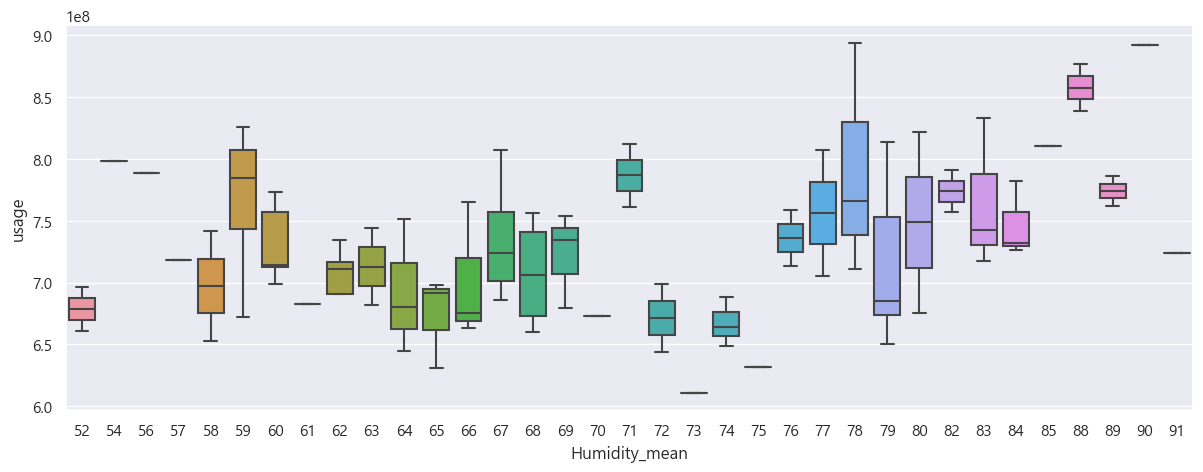

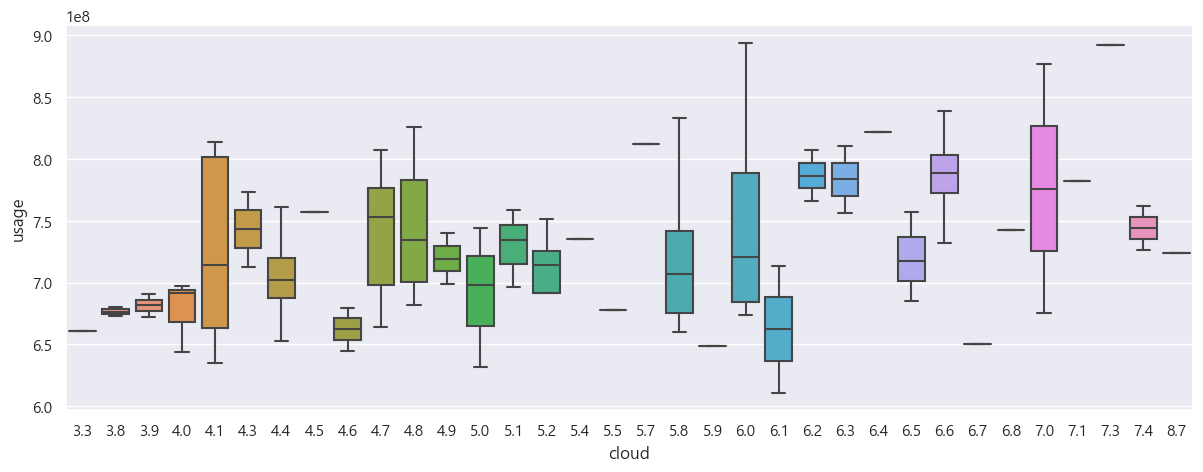

In [85]:
plt.figure(figsize=(32,5)) # 그래프 크기 조정 
plt.subplot(1,2,1) # 1행 2열의 첫번째(1행, 1열) 그래프
sns.boxplot(x='Humidity_mean', y='usage', data = kw_df, showfliers=False)

plt.figure(figsize=(32,5)) # 그래프 크기 조정
plt.subplot(1,2,2) # 1행 2열의 첫번째(1행, 1열) 그래프
ax = sns.boxplot(x='cloud', y='usage', data = kw_df, showfliers=False)

plt.show()

In [86]:
kw_df_year_month_type = df.pivot_table(index=['month'], 
                                     columns='type',
                                     values='usage', 
                                     aggfunc='sum')
kw_df_year_month_type

type,1,2,3,4,5,6,7
month,,,,,,,
1,1913650669,1293689897,55119408,217089269,72696497,1862118301,107443863
2,1895073864,1298171299,52116498,180555429,72800901,1757692027,110064170
3,1620068516,1149107308,46803338,169992451,55907291,1813006973,88364848
4,1546848284,1185319569,45876349,157380349,41680012,1791082953,67612982
5,1447011978,1103649355,41759403,127987886,30991668,1721327257,38036190
6,1613277294,1131121720,39804538,149615717,34111967,1834680408,28880077
7,1836508092,1256493038,38440034,185030504,35285591,1946416665,28994347
8,2121159471,1631010927,40696191,178778870,48032977,1868741258,28941380
9,1892782934,1424957393,43407438,177318244,41942456,1818308569,23594611


# 월별 전력 사용량(용도별)

In [87]:
kw_df_year_month_type.rename(columns={1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심야'}, inplace=True)

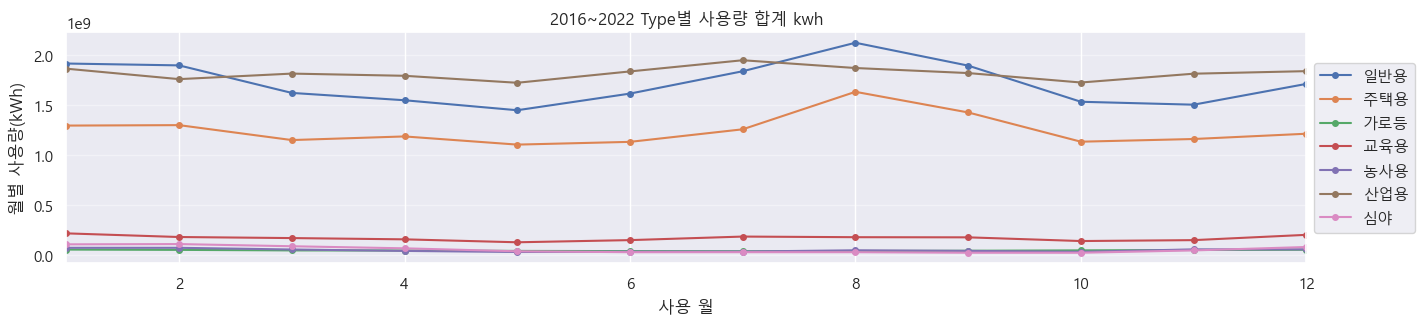

In [88]:
plt.figure(figsize = (16,3))
plt.plot(kw_df_year_month_type, marker = 'o', markersize=4)
plt.grid(axis='y', linestyle='-', alpha=0.4)
plt.legend(kw_df_year_month_type.columns, 
           loc='center left', bbox_to_anchor=(1, 0.5)) # 그래프 범례를 그래프 밖에 위치
plt.title('2016~2022 Type별 사용량 합계 kwh')
plt.xlabel('사용 월')
plt.ylabel('월별 사용량(kWh)')
plt.autoscale(axis='x', tight=True)
plt.show()

typename = {1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심 야'}

# 2016~2022 용도별 전력 사용량 비율

In [89]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px


color_map = {"산업용": px.colors.sequential.Viridis[0], 
             "일반용": px.colors.sequential.Viridis[2], 
             "주택용": px.colors.sequential.Viridis[4], 
             "교육용": px.colors.sequential.Viridis[6], 
             "농사용": px.colors.sequential.Viridis[8], 
             "심  야": px.colors.sequential.Viridis[9], 
             "가로등": px.colors.sequential.Viridis[1]}

usage_part = df.groupby('type')['usage'].sum().sort_values(ascending=False)
subfig = make_subplots(
    rows=1, cols=2,
    column_widths=[10, 10],
    row_heights=[10],
    subplot_titles=("용도별 전력 사용량", "전체 전력 사용량"),
    specs=[[{"type": "pie"}, {"type": "bar"}]])

usage_part.index = ["산업용","일반용","주택용","교육용","심  야", "농사용","가로등"]

# 파이 그래프 생성
subfig.add_trace(go.Pie( labels=usage_part.index, values=usage_part.values, showlegend=True, marker=dict(colors=[color_map[t] for t in usage_part.index])),1,1)

# 데이터를 그룹화, 막대 그래프
subfig.add_trace(go.Bar(x=usage_part.index, y=usage_part.values, showlegend=False, marker=dict(color=[color_map[t] for t in usage_part.index])),1,2)

# 서브플롯 레이아웃을 설정
subfig.update_layout(template="plotly_white", title='2016 ~ 2022 전력 사용량')

# 서브플롯 출력
subfig.show()


# 용도별 전기 사용량 (월별)

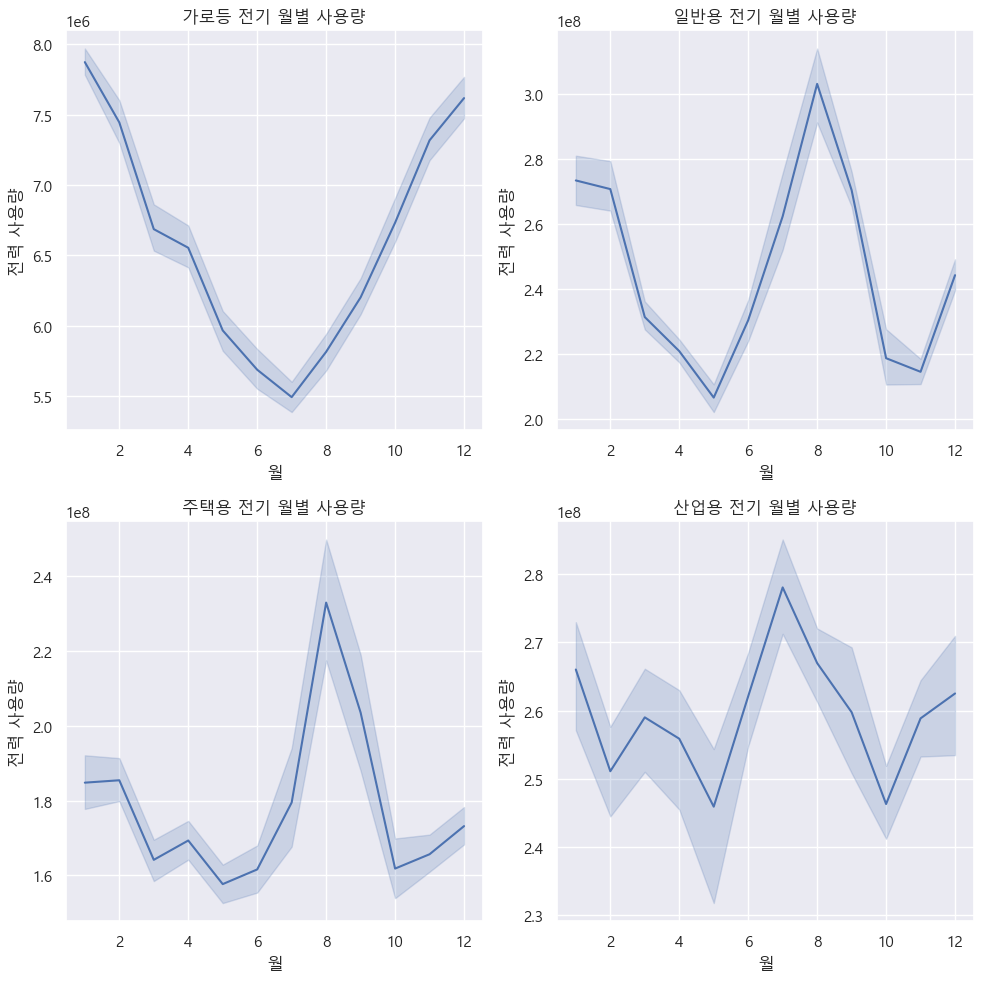

In [90]:
# typename = {1:'일반용', 2:'주택용', 3:'가로등', 4:'교육용', 5:'농사용', 6:'산업용', 7:'심 야'}
#가로등 전기 월별 사용량 
from matplotlib import font_manager, rc

if platform.system() == 'Windows':  # 현재 운영체제가 Windows인 경우
    # 폰트 파일 경로를 지정
    # 해당 폰트 파일의 이름 호출
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                            ).get_name()
    # 폰트 이름과 크기를 설정
    rc('font', family=font_name, size=8)
    
fig , ax  = plt.subplots(2,2) 
sns.set(rc={'figure.figsize':(10,10)})

sns.lineplot(data=type3_df, x = 'month', y='usage',ax=ax[0][0])
ax[0][0].set_xlabel('월')
ax[0][0].set_ylabel('전력 사용량')
ax[0][0].set_title('가로등 전기 월별 사용량')

#일반용 전기 월별 사용량 
sns.lineplot(data=type1_df, x = 'month', y='usage', ax=ax[0][1])
ax[0][1].set_xlabel('월')
ax[0][1].set_ylabel('전력 사용량')
ax[0][1].set_title('일반용 전기 월별 사용량')


#주택용 전기 월별 사용량
sns.lineplot(data=type2_df, x = 'month', y='usage', ax = ax[1][0])
ax[1][0].set_xlabel('월')
ax[1][0].set_ylabel('전력 사용량')
ax[1][0].set_title('주택용 전기 월별 사용량')


#산업용 전기 월별 사용량 
g = sns.lineplot(data=type6_df, x = 'month', y='usage',ax = ax[1][1])
ax[1][1].set_xlabel('월')
ax[1][1].set_ylabel('전력 사용량')
ax[1][1].set_title('산업용 전기 월별 사용량')
                                                               
plt.tight_layout()
plt.show()

In [91]:
df

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
5,2016,1,1,0.9,69,49.7,6.0,244.83,13.5,255851378
6,2016,1,2,0.9,69,49.7,6.0,244.83,13.5,173309722
0,2016,1,3,0.9,69,49.7,6.0,244.83,13.5,7842078
1,2016,1,4,0.9,69,49.7,6.0,244.83,13.5,27092538
2,2016,1,5,0.9,69,49.7,6.0,244.83,13.5,9785066
...,...,...,...,...,...,...,...,...,...,...
581,2022,12,3,1.1,63,30.6,5.0,275.78,32.9,7316937
582,2022,12,4,1.1,63,30.6,5.0,275.78,32.9,31159967
583,2022,12,5,1.1,63,30.6,5.0,275.78,32.9,8624110
584,2022,12,6,1.1,63,30.6,5.0,275.78,32.9,256259483


In [92]:
df.columns

Index(['year', 'month', 'type', 'temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow', 'usage'],
      dtype='object')

In [94]:
day_df_corr = df.corr()
day_df_corr_sort = day_df_corr.sort_values('usage', ascending=False)
day_df_corr_sort.head(10)

,year,month,type,temp,Humidity_mean,rainfall_total,cloud,solar,snow,usage
usage,1.544527e-02,-8.609918e-03,-3.548239e-01,5.038952e-03,2.646979e-02,1.804871e-02,2.564153e-02,-2.007282e-02,1.631955e-02,1.000000
Humidity_mean,-5.976416e-04,3.562942e-01,-4.519488e-17,7.383405e-01,1.000000e+00,6.850695e-01,7.599735e-01,8.197841e-02,-2.283105e-01,0.026470
cloud,4.198165e-02,5.237492e-02,3.178289e-17,5.427388e-01,7.599735e-01,6.482212e-01,1.000000e+00,4.236026e-02,-1.387755e-01,0.025642
rainfall_total,-4.081422e-02,1.257373e-01,1.505194e-17,6.107293e-01,6.850695e-01,1.000000e+00,6.482212e-01,2.153267e-01,-2.398070e-01,0.018049
snow,8.476269e-02,-6.426208e-02,9.833063e-18,-5.215840e-01,-2.283105e-01,-2.398070e-01,-1.387755e-01,-4.370830e-01,1.000000e+00,0.016320
year,1.000000e+00,3.774111e-14,2.305034e-15,1.273597e-03,-5.976416e-04,-4.081422e-02,4.198165e-02,3.681638e-02,8.476269e-02,0.015445
temp,1.273597e-03,2.674031e-01,-3.129885e-17,1.000000e+00,7.383405e-01,6.107293e-01,5.427388e-01,6.603860e-01,-5.215840e-01,0.005039
month,3.774111e-14,1.000000e+00,7.526169e-17,2.674031e-01,3.562942e-01,1.257373e-01,5.237492e-02,-2.196398e-01,-6.426208e-02,-0.008610
solar,3.681638e-02,-2.196398e-01,-4.720550e-17,6.603860e-01,8.197841e-02,2.153267e-01,4.236026e-02,1.000000e+00,-4.370830e-01,-0.020073
type,2.305034e-15,7.526169e-17,1.000000e+00,-3.129885e-17,-4.519488e-17,1.505194e-17,3.178289e-17,-4.720550e-17,9.833063e-18,-0.354824


# 각 컬럼과의 상관 관계도

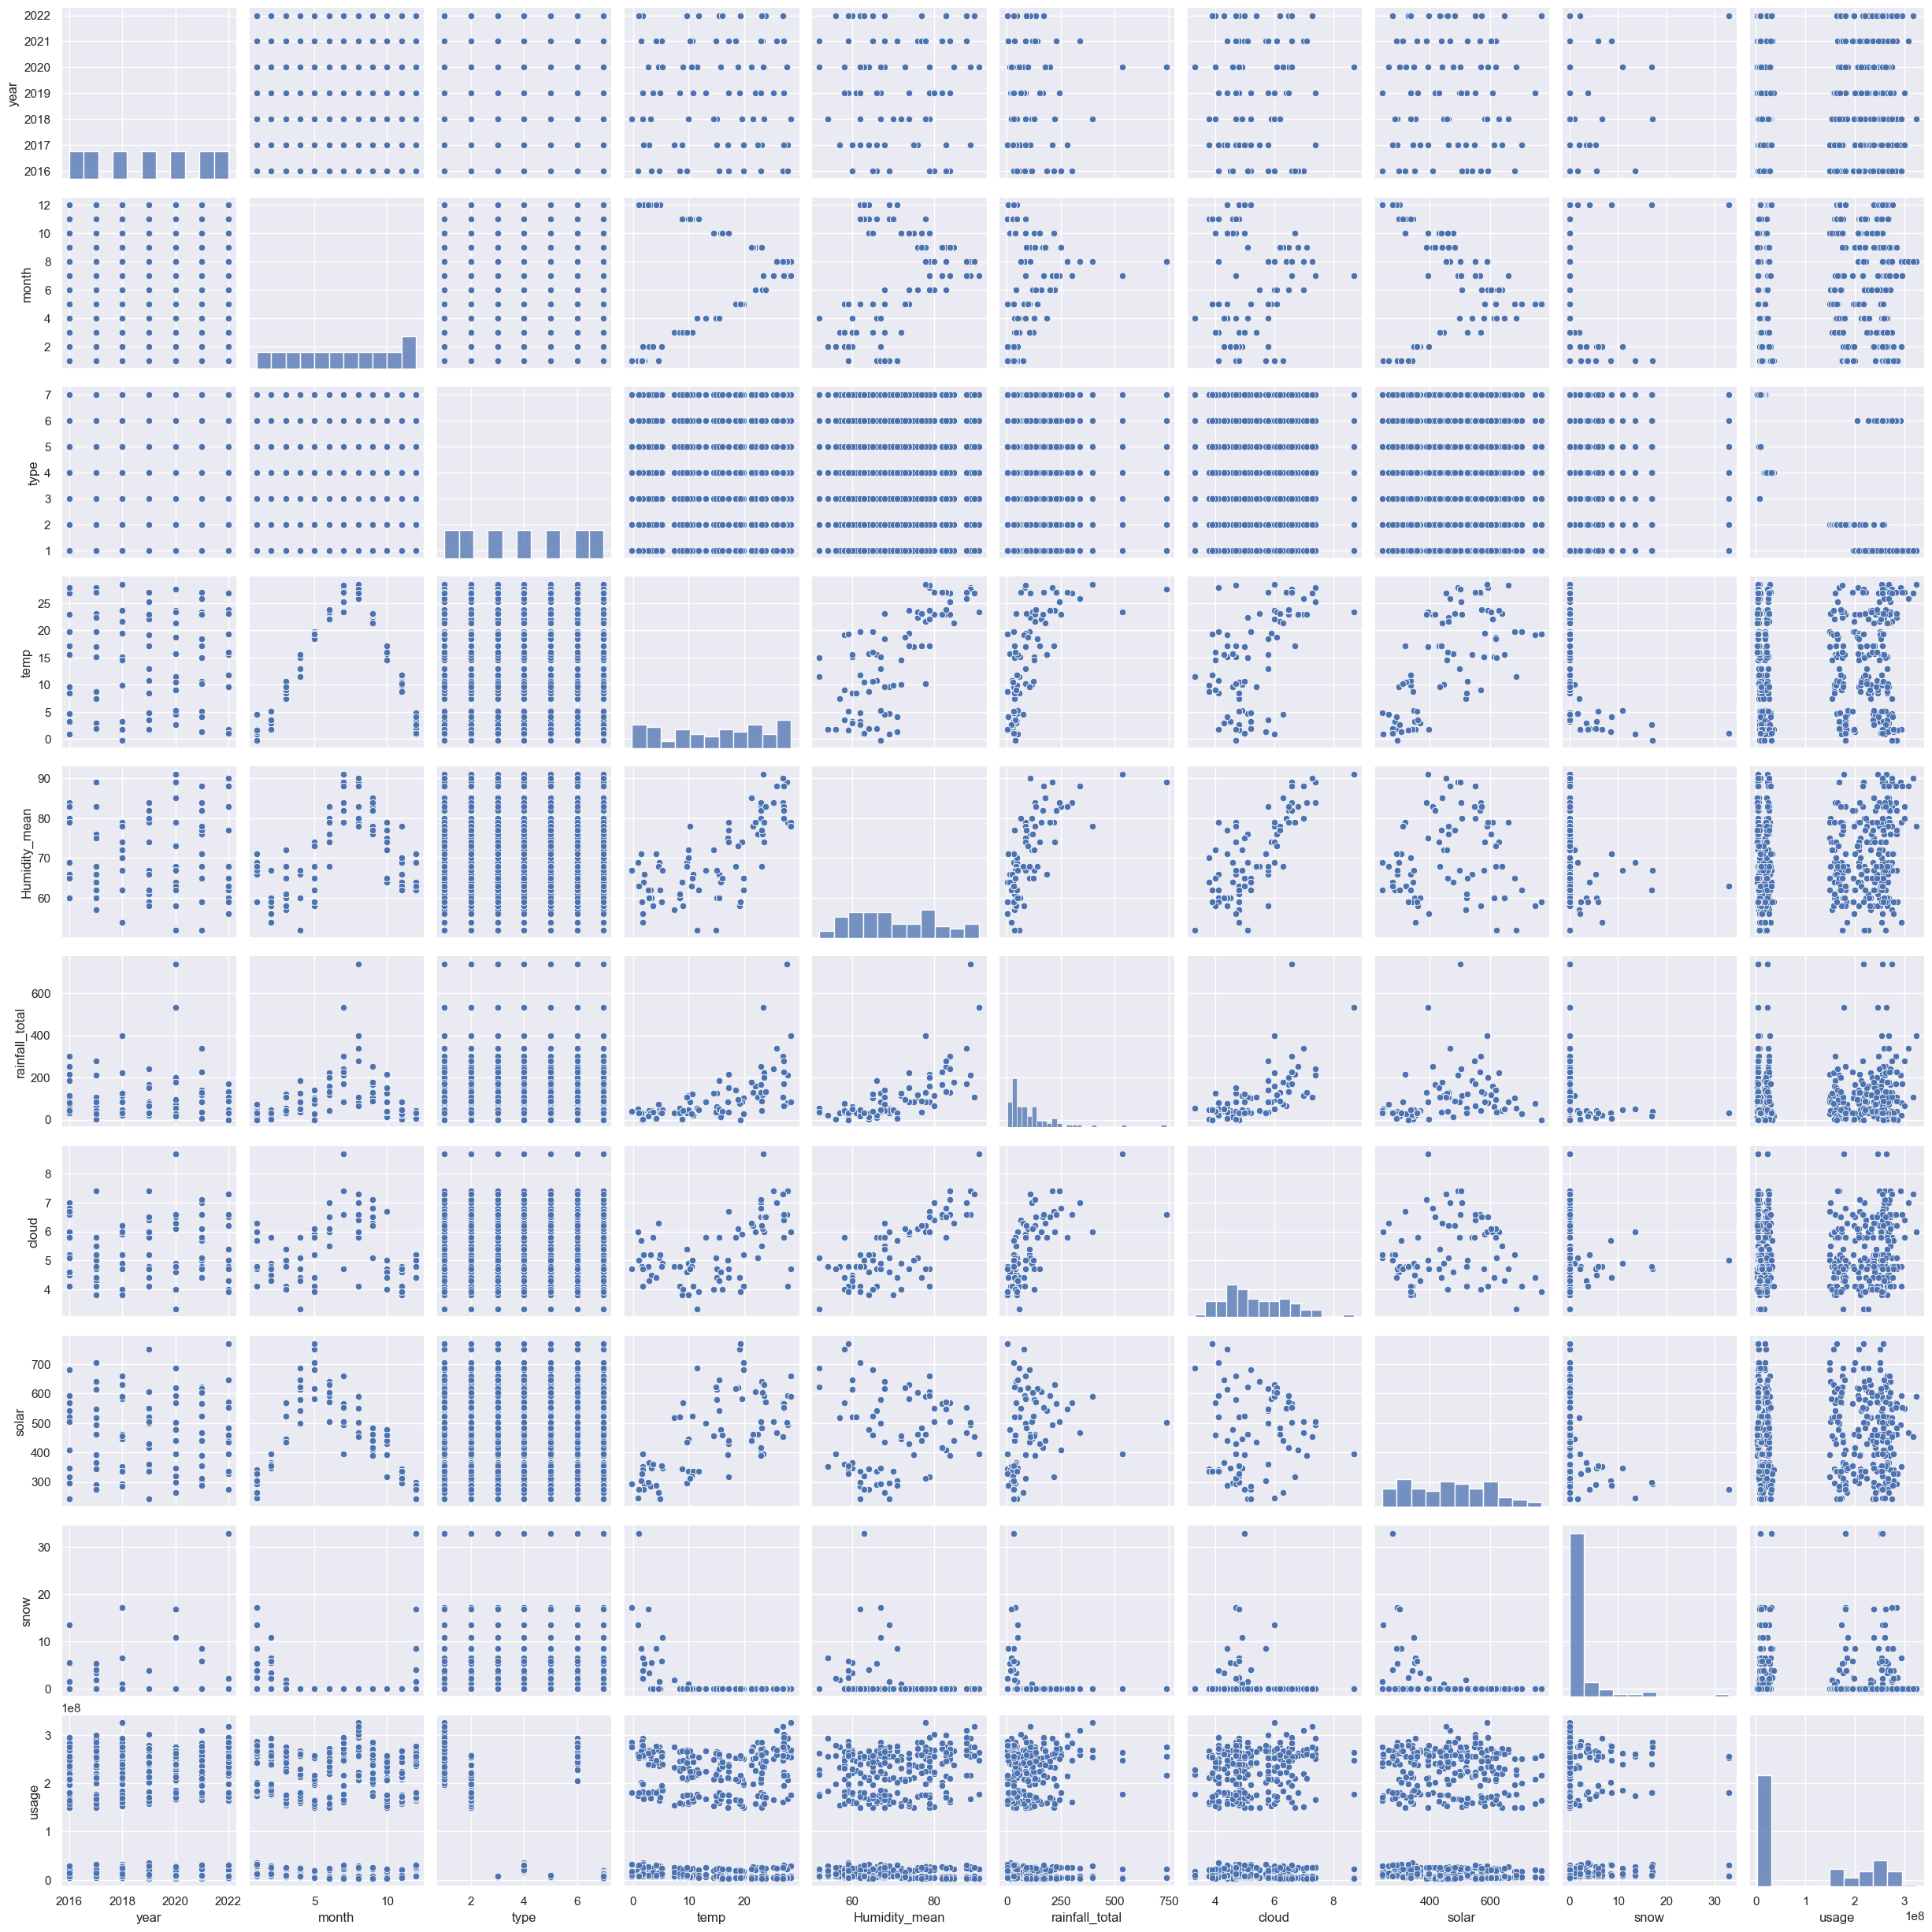

In [95]:
cols = ['year', 'month', 'type', 'temp', 'Humidity_mean', 'rainfall_total',
       'cloud', 'solar', 'snow', 'usage']
sns.pairplot(df[cols])
plt.show()